In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='D://SimpliLearn Projects//Data-Science-Capstone-Projects//Project_2//Healthcare - Diabetes//'
df = pd.read_csv(path+'health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# 1.Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [6]:
for column in zero_columns:
    df[column]=df[column].mask(df[column]==0).fillna(df[column].mean())

<Figure size 864x720 with 0 Axes>

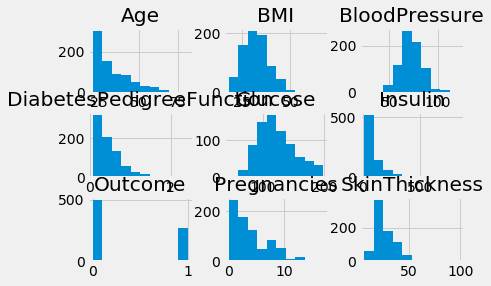

In [7]:
# 2.Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 10))
df.hist()
plt.show()

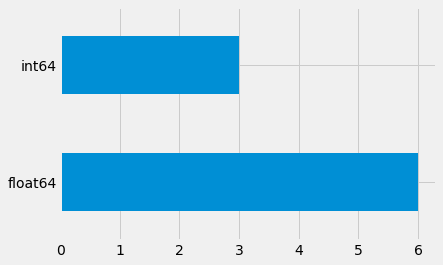

In [8]:
#3. We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 
df.dtypes.value_counts().plot(kind='barh')

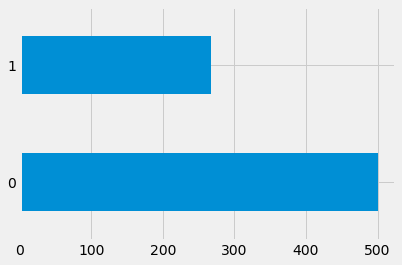

In [9]:
#4.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.
df['Outcome'].value_counts().plot(kind='barh')

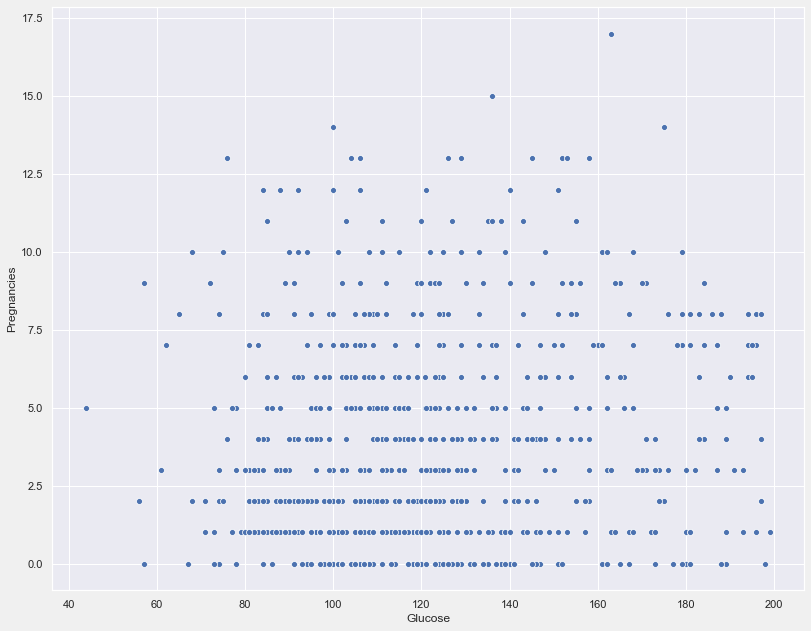

In [10]:
#5.Create scatter charts between the pair of variables to understand the relationships. Describe your findings
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.set()
sns.scatterplot(x='Glucose', y='Pregnancies', data=df)
plt.show()

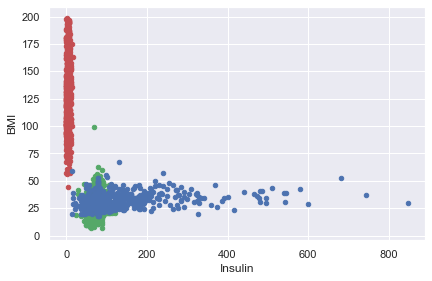

In [11]:
ax1 = df.plot(kind='scatter', x='Pregnancies', y='Glucose', color='r')    
ax2 = df.plot(kind='scatter', x='BloodPressure', y='SkinThickness', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Insulin', y='BMI', color='b', ax=ax1)
plt.show()

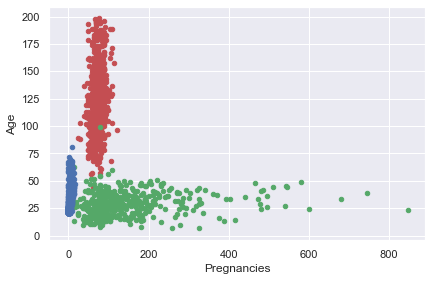

In [12]:
ax1 = df.plot(kind='scatter', x='BloodPressure', y='Glucose', color='r')   
ax2 = df.plot(kind='scatter', x='Insulin', y='SkinThickness', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Pregnancies', y='Age', color='b', ax=ax1)
plt.show()

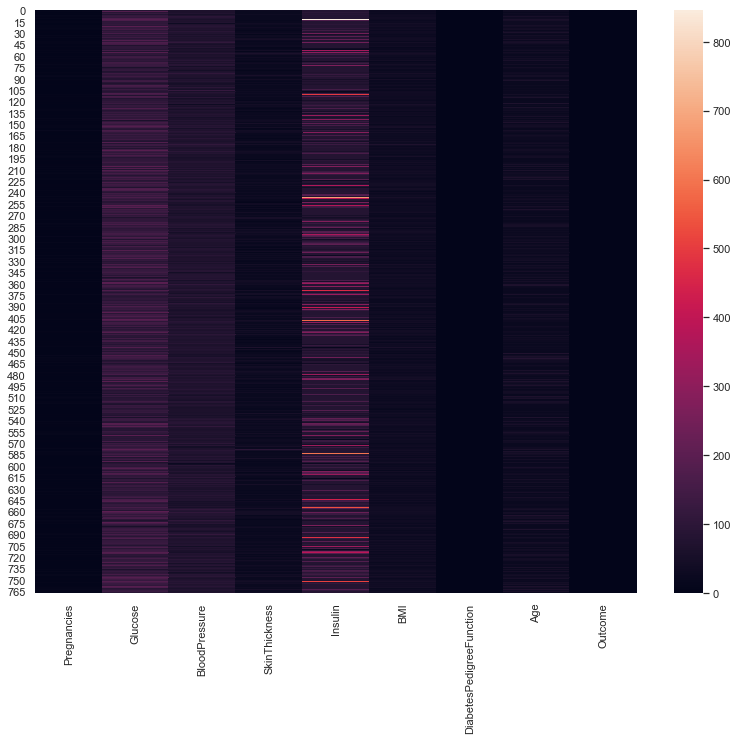

In [13]:
#6.Perform correlation analysis. Visually explore it using a heat map.
plt.figure(figsize=(12, 10))
sns.heatmap(df)
plt.show()

In [14]:
#7.Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [16]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
svc = SVC()
svc.fit(x_train, y_train)
ypred = svc.predict(x_test)

In [18]:
print(accuracy_score(ypred, y_test))

0.734375


In [19]:
print(confusion_matrix(ypred, y_test))

[[106  34]
 [ 17  35]]


In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [21]:
grid_predict = grid.predict(x_test)
print(accuracy_score(grid_predict, y_test))

0.6979166666666666


In [22]:
print(confusion_matrix(grid_predict, y_test))

[[94 29]
 [29 40]]


In [23]:
print(classification_report(grid_predict,y_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       123
           1       0.58      0.58      0.58        69

    accuracy                           0.70       192
   macro avg       0.67      0.67      0.67       192
weighted avg       0.70      0.70      0.70       192



In [24]:
#8.Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [36]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LReg', LinearRegression()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [28]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Digesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Digesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Digesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


LR: 0.766883 (0.053005)
LDA: 0.770848 (0.049695)


C:\Users\Digesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Digesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.717379 (0.062974)
CART: 0.682297 (0.067227)
NB: 0.744771 (0.043265)


C:\Users\Digesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Digesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.759176 (0.054923)


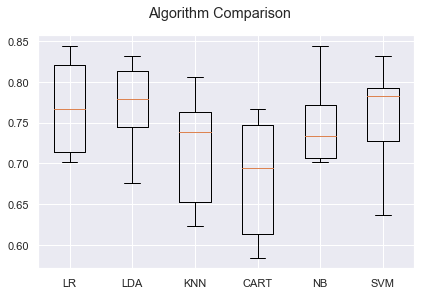

In [29]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

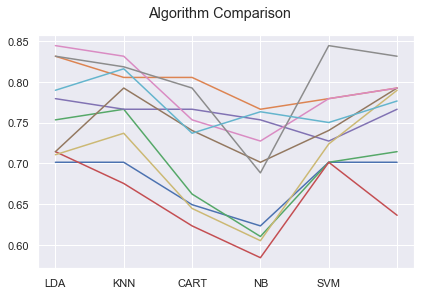

In [32]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.plot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)    
    results.append(accuracy_score(ypred, y_test))
    names.append(name)

LR
LDA
KNN
CART
NB
SVM


C:\Users\Digesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
print(results)
print(names)

[0.7395833333333334, 0.7395833333333334, 0.6458333333333334, 0.6822916666666666, 0.7291666666666666, 0.734375]
['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']


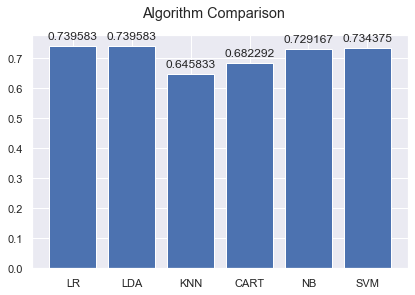

In [58]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names, results)
#ax.set_yticklabels(results)
add_value_labels(ax)
#for i in range(len(results)):
#    plt.text(x = names[i], y = results[i],s = results[i],size = 12)
plt.show()

In [48]:
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.6f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [59]:
#9.Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [77]:
#roc_auc_score(y_test, ypred)

fpr, tpr, threshold = roc_curve(y_test, ypred)
roc_auc = metrics.auc(fpr, tpr)

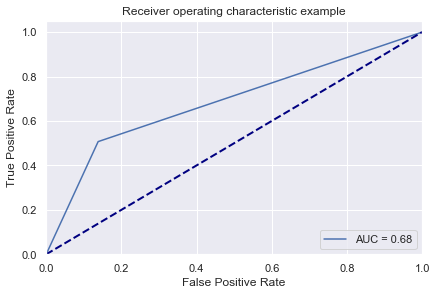

In [78]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()